# Student Performance Dataset  
### Regression Problem

## Day 8 – Problem Understanding & Data Loading

In [10]:
# DAY 8: Problem Understanding & Data Loading

# Problem Statement:
# Predict student performance (Performance Index) using study-related features.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df2 = pd.read_csv("Student_performance.csv")

# Inspect dataset
print("Dataset Shape:", df2.shape)
print("\nColumn Names:\n", df2.columns)
print("\nData Types:\n", df2.dtypes)

print("\nFirst 5 Rows:\n", df2.head())
print("\nLast 5 Rows:\n", df2.tail())

# Identify features and target
X = df2.drop("Performance Index", axis=1)
y = df2["Performance Index"]

print("\nFeatures:\n", X.columns)
print("Target: Performance Index")



Dataset Shape: (10000, 6)

Column Names:
 Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

Data Types:
 Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                         float64
Sample Question Papers Practiced      int64
Performance Index                     int64
dtype: object

First 5 Rows:
    Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes          NaN   
1              4               82                         No          4.0   
2              8               51                        Yes          7.0   
3              5               52                        Yes          5.0   
4              7               75                         No          NaN   

   Sample Qu

## Day 9 – Data Understanding, Cleaning & Encoding


In [12]:
# DAY 9: Data Understanding, Cleaning & Encoding

# Check missing values
print("Missing Values:\n", df2.isnull().sum())

# Check duplicate rows
print("\nDuplicate Rows:", df2.duplicated().sum())

# Summary statistics
print("\nSummary Statistics:\n", df2.describe())

# Encode categorical variable: Extracurricular Activities
df2["Extracurricular Activities"] = df2["Extracurricular Activities"].map({
    "Yes": 1,
    "No": 0
})

# Verify encoding
print("\nEncoded Extracurricular Activities:\n", df2["Extracurricular Activities"].head())


Missing Values:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         2
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Duplicate Rows: 127

Summary Statistics:
        Hours Studied  Previous Scores  Sleep Hours  \
count   10000.000000     10000.000000  9998.000000   
mean        4.992900        69.445700     6.530206   
std         2.589309        17.343152     1.695789   
min         1.000000        40.000000     4.000000   
25%         3.000000        54.000000     5.000000   
50%         5.000000        69.000000     7.000000   
75%         7.000000        85.000000     8.000000   
max         9.000000        99.000000     9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                          

## Day 10 – Univariate Analysis, Feature Scaling & Data Splitting

       Hours Studied  Previous Scores  Extracurricular Activities  \
count   10000.000000     10000.000000                10000.000000   
mean        4.992900        69.445700                    0.494800   
std         2.589309        17.343152                    0.499998   
min         1.000000        40.000000                    0.000000   
25%         3.000000        54.000000                    0.000000   
50%         5.000000        69.000000                    0.000000   
75%         7.000000        85.000000                    1.000000   
max         9.000000        99.000000                    1.000000   

       Sleep Hours  Sample Question Papers Practiced  Performance Index  
count  9998.000000                      10000.000000       10000.000000  
mean      6.530206                          4.583300          55.224800  
std       1.695789                          2.867348          19.212558  
min       4.000000                          0.000000          10.000000  
25%     

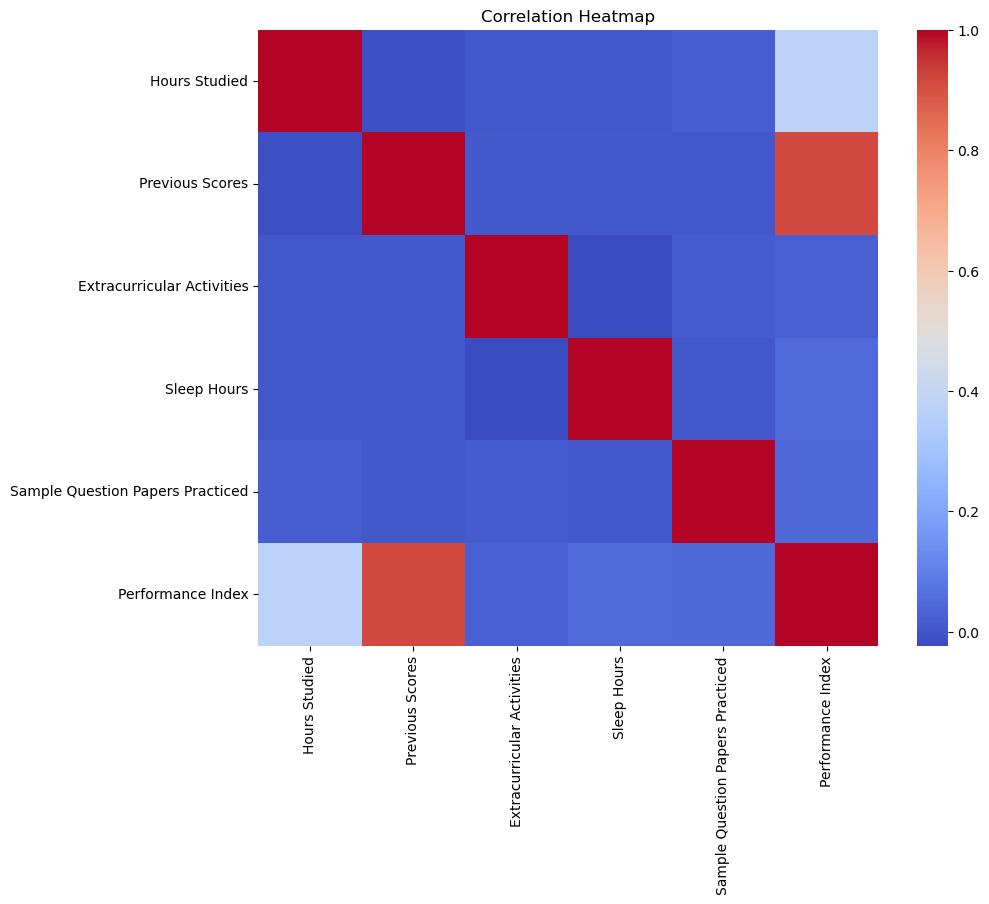

In [16]:
# DAY 10: Data Analysis & Preprocessing

# Summary statistics
print(df2.describe())

# Encode categorical variables
df2_encoded = pd.get_dummies(df2, drop_first=True)

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df2_encoded.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Features & Target (CORRECT)
X = df2_encoded.drop("Performance Index", axis=1)
y = df2_encoded["Performance Index"]

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Day 11 – Model Training & Evaluation

In [20]:
# Handle missing values using SimpleImputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [22]:
# DAY 11: Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 4.082353922850039
R2 Score: 0.988984031612187


## Final Conclusion

- The PIMA Diabetes dataset was used to build classification models.
- Logistic Regression, KNN, and Decision Tree were compared.
- Logistic Regression showed stable performance.

- The Student Performance dataset was used for regression analysis.
- Linear Regression provided a baseline prediction model.
- Feature encoding and scaling improved model performance.

**Project successfully completed as per internship requirements.**
